<a href="https://colab.research.google.com/github/ryan9453/0602/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from urllib.request import urlretrieve
url = 'https://github.com/ryan9453/0602/raw/main/titanic/train.csv'
urlretrieve(url, 'train.csv')
url = 'https://github.com/ryan9453/0602/raw/main/titanic/test.csv'
urlretrieve(url, 'test.csv')

('test.csv', <http.client.HTTPMessage at 0x7f18b7a7a190>)

In [5]:
import pandas as pd
train_df = pd.read_csv('train.csv', encoding = 'utf-8')
test_df = pd.read_csv('test.csv', encoding = 'utf-8')

In [6]:
data = pd.concat([train_df, test_df], ignore_index = True)
data = data.drop(['PassengerId', 'Survived'], axis = 1)

test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
na = data.isna().sum()
# na

# Series[帶入跟你的資料筆數一樣多的 True/False list]
# na = data.isna().sum()
na[na > 0].sort_values(ascending = False)


Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [8]:
# 補類別(最常出現)
def cabin_head(s):
    if not pd.isna(s):
        return s[0]
data['Cabin'] = data['Cabin'].apply(cabin_head)

In [9]:
dic = data['Ticket'].value_counts()
data['Ticket'] = data['Ticket'].apply(lambda t:dic[t])

In [10]:
# 補缺失值 (類別: 最常出現) [!如果一堆測試資料，不要重算，直接補S]
most = data['Embarked'].value_counts().idxmax()
data['Embarked'] = data['Embarked'].fillna(most)


In [11]:
# 補缺失(數值: 中位數)
med = data.median().drop(['Pclass'])
data = data.fillna(med)
na = data.isna().sum()
na[na > 0].sort_values(ascending = False)

Cabin    1014
dtype: int64

In [12]:
def name_convert(s):
    s = s.split(',')[-1].split('.')[0]
    s = s.strip() # 去除多餘空格
    return s
counts = data['Name'].apply(name_convert).value_counts()
whitelist = counts[counts > 50].index

def name_convert(s):
    s = s.split(',')[-1].split('.')[0]
    s = s.strip() # 去除多餘空格
    if s in whitelist:
        return s
    else:
        return None
data['Name'] = data['Name'].apply(name_convert)

In [13]:
data = pd.get_dummies(data)
data = pd.get_dummies(data, columns = ['Pclass'])
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [14]:
# 模型建立完，後續的嘗試，只是老師嘗試過，所以直接做
data['Family'] = data['SibSp'] + data['Parch']
data

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [21]:
# 得到資料[列數] 可用下列兩種
print(len(data)) # 得到列數
print(data.shape) # 得到 ( 列數, 欄數)
train_df.shape

1309
(1309, 26)


(891, 12)

In [20]:
# .loc (根據列編號)(X) iloc(根據第幾個)(O)
# .iloc [第一列, 第二列, 第三列]
x_train = data.iloc[:train_df.shape[0]]
y_train = train_df['Survived']
x_predict = data.iloc[train_df.shape[0]:]
x_train
x_predict

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
891,34.5,0,0,1,7.8292,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
892,47.0,1,0,1,7.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
893,62.0,0,0,1,9.6875,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
894,27.0,0,0,1,8.6625,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
895,22.0,1,1,2,12.2875,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [33]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
params = {
    # (1). 5 (2).[1, 2, 3] (3). range
    # 20-99
    'n_estimators': range(20,100),
    # 3-10
    'max_depth': range(3,11)    
}
clf = RandomForestClassifier()
cv = GridSearchCV(clf, params, cv = 10, n_jobs = -1)
cv.fit(x_train, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.845143570536829
{'max_depth': 7, 'n_estimators': 36}


In [ ]:
# cross_val_score 之重要參數
# sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
# cv = cross validation ( 交叉驗證 )，測試data 的資料數
# n_jobs = cpu 的個數

In [57]:
clf = RandomForestClassifier(n_estimators = 36, max_depth = 7)
scores = cross_val_score(clf, x_train, y_train, cv = 10, n_jobs = -1)
print('10:', scores)
print('average:', np.average(scores))

10: [0.84444444 0.87640449 0.75280899 0.88764045 0.86516854 0.83146067
 0.83146067 0.78651685 0.85393258 0.82022472]
average: 0.8350062421972535


In [58]:
clf = RandomForestClassifier(n_estimators = 36, max_depth = 7)
clf.fit(x_train, y_train)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':pre
})
df.to_csv('rf.csv', encoding = 'utf-8', index = False)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[Text(279.0, 475.65000000000003, 'Fare <= 52.277\ngini = 0.464\nsamples = 562\nvalue = [565, 326]\nclass = Dead'),
 Text(139.5, 339.75, 'Fare <= 10.825\ngini = 0.414\nsamples = 472\nvalue = [527, 218]\nclass = Dead'),
 Text(69.75, 203.85000000000002, 'Embarked_S <= 0.5\ngini = 0.299\nsamples = 230\nvalue = [303, 68]\nclass = Dead'),
 Text(34.875, 67.94999999999999, '\n  (...)  \n'),
 Text(104.625, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 203.85000000000002, 'Sex_male <= 0.5\ngini = 0.48\nsamples = 242\nvalue = [224, 150]\nclass = Dead'),
 Text(174.375, 67.94999999999999, '\n  (...)  \n'),
 Text(244.125, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 339.75, 'Cabin_B <= 0.5\ngini = 0.385\nsamples = 90\nvalue = [38, 108]\nclass = Alived'),
 Text(348.75, 203.85000000000002, 'Sex_female <= 0.5\ngini = 0.431\nsamples = 65\nvalue = [33, 72]\nclass = Alived'),
 Text(313.875, 67.94999999999999, '\n  (...)  \n'),
 Text(383.625, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 203

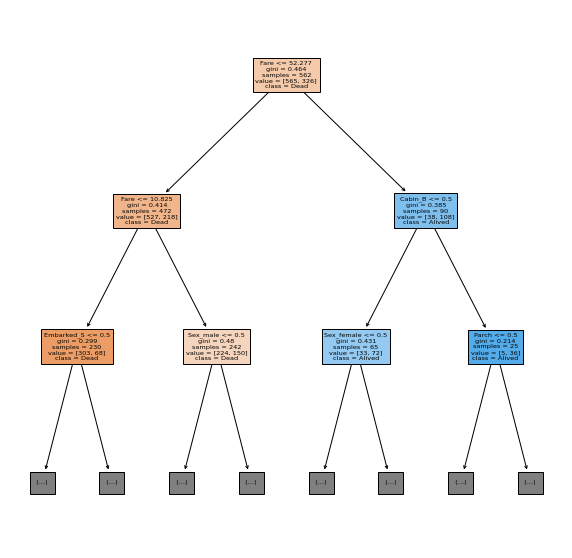

In [60]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf.estimators_[0], 
        feature_names=data.columns, 
        class_names=["Dead", 'Alived'],
        max_depth = 2,
        filled=True)

In [61]:
pd.DataFrame({
    'Name':data.columns,
    'Importance':clf.feature_importances_
}).sort_values(by = 'Importance', ascending = False)
# sum(clf.feature_importances_)

,Name,Importance
7,Name_Mr,0.146650
9,Sex_female,0.142186
10,Sex_male,0.137947
4,Fare,0.104346
0,Age,0.076332
24,Pclass_3,0.066309
3,Ticket,0.052458
25,Family,0.039532
22,Pclass_1,0.038222
1,SibSp,0.036094


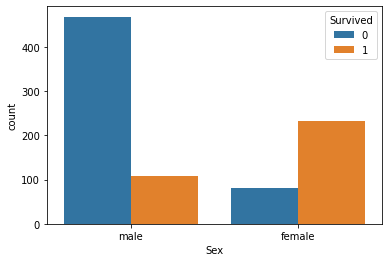

In [63]:
import seaborn as sns
sns.countplot(x = train_df['Sex'], hue = train_df['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

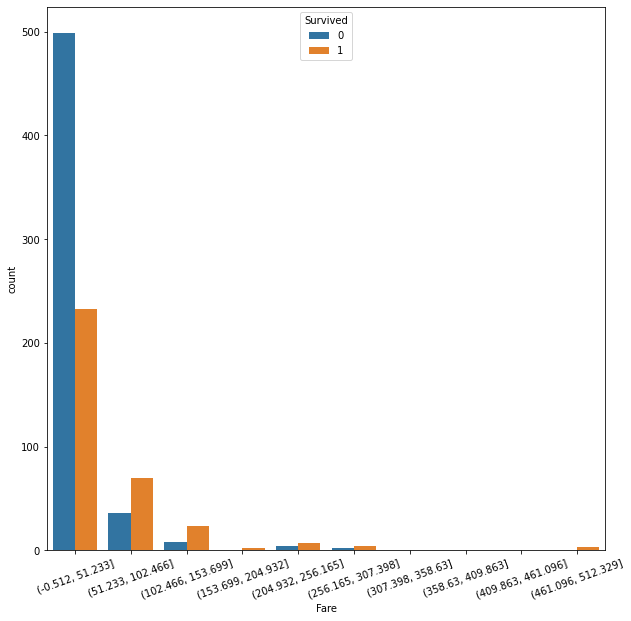

In [64]:
plt.figure(figsize=(10,10))
c = pd.cut(train_df['Fare'], bins = 10)
sns.countplot(c, hue = train_df['Survived'])
plt.xticks(rotation = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

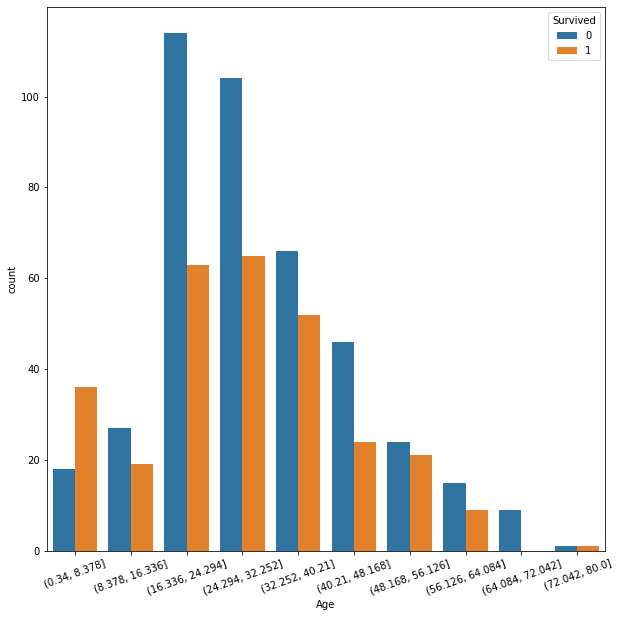

In [65]:
plt.figure(figsize=(10,10))
c = pd.cut(train_df['Age'], bins = 10)
sns.countplot(c, hue = train_df['Survived'])
plt.xticks(rotation = 20)

In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns = data.columns)
# .loc (根據列編號)(X) iloc(根據第幾個)(O)
# .iloc [第一列, 第二列, 第三列]
x_train_scale = data_scale.iloc[:train_df.shape[0]]
x_predict_scale = data_scale.iloc[train_df.shape[0]:]
x_train_scale

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.336089,0.000,0.000000,0.0,0.025374,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
887,0.235876,0.000,0.000000,0.0,0.058556,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
888,0.348616,0.125,0.222222,0.3,0.045771,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.3
889,0.323563,0.000,0.000000,0.0,0.058556,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors':range( 3, 100 )    
}
clf = KNeighborsClassifier()
cv = GridSearchCV(clf, params, cv = 10, n_jobs = -1)
cv.fit(x_train_scale, y_train)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [55]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train_scale, y_train)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':pre
})
df.to_csv('knn.csv',encoding='utf-8',index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
